<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> Fourth section : Conclusion </center>


In this notebook you will be comparing the results of the two methods we used on the created testset. That is said: you will compare the results to the clustering with the results of the classification on the same test test and provide insights and explanation about the observed behaviour.

For this final task you will need to : 
1. Load the testset data that you created all along this project 
2. For each cluster provide percentages about each actual/ predicted class contained with this cluster. Eg : cluster N°2 : is made of ( 50% class 2 and 50% class 3 ) from actual labels and ( 40 % predicted class 2 and 40% predicted class 3 + 20% predicted class 1) 
The above is just an example and is far away from the actual situation.

3. Explain the behaviour and provide isights about it 

## 1.  Load the data: 

In [132]:
import pandas as pd 

In [133]:
# To-Do : load the test summary data 
df = pd.read_csv('test_summary.csv')

In [134]:
df.head()

,ID,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster,Category,Predicted_class
0,249,55,1,28.1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4,3,0,0
1,366,39,0,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3,3,0,0
2,433,48,0,43.7,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1,3,0,0
3,611,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,2,4,4
4,133,44,1,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,3,0,0


## 2. Analysis: 

In [109]:
# To-Do create a summary about each cluster : 
# percentages of each target (actual Category) within each cluster 
# + Percentages of each predicted class within the cluster 
# results should be something like : 
# For clusterk : {'true_class0_percetage': 0.0,
#                 'true_class1_percetage': 0.0,
#                  'true_class2_percetage': 0.0,
#                   'true_class3_percetage': 0.0,
#                   'true_class4_percetage': 0.0,
#                   'predicted_class0_percetage': 0.0,
#                   'predicted_class1_percetage': 0.0,
#                   'predicted_class2_percetage': 0.0,
#                   'predicted_class3_percetage': 0.0,
#                    'predicted_class4_percetage': 0.0}

In [145]:
results = {}

for cluster in df['cluster'].unique():
    cluster_df = df[df['cluster'] == cluster]
    count_cluster = len(cluster_df)

    result = {}

    true_count = cluster_df['Category'].value_counts(normalize = True)
    pred_count = cluster_df['Predicted_class'].value_counts(normalize = True)

    for category in range(0,5):
        label = f'true_class{category}_percentage'
        result[label] =(true_count.get(category,0)) *100
    
    for category in range(0,5):
        label = f'predicted_class{category}_percentage'
        result[label] = (pred_count.get(category,0)) *100

    results[f'cluster_{cluster}'] = result

In [148]:
results.keys()

dict_keys(['cluster_3', 'cluster_2', 'cluster_4', 'cluster_1'])

In [147]:
cluster_0_df = df[df['cluster'] == 0]
cluster_0_df

,ID,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster,Category,Predicted_class


In [144]:
clust_count = df['cluster'].value_counts()
clust_count

cluster
3    83
4    34
2     4
1     2
Name: count, dtype: int64

## 3. Explanations and isights :

In [1]:
# in this section you should display analysis about each cluster and comment those one by one 

In [149]:
results_df = pd.DataFrame(results)
results_df['t/p'] = ['true' if str(idx).startswith('true') else 'predicted' for idx in results_df.index]
results_df['class'] = results_df.index.to_series().str.extract(r'(class\w+)')
results_df['class'] = results_df['class'].str[:6]

In [150]:
results_df

,cluster_3,cluster_2,cluster_4,cluster_1,t/p,class
true_class0_percentage,93.975904,0.0,52.941176,0.0,true,class0
true_class1_percentage,0.000000,25.0,5.882353,0.0,true,class1
true_class2_percentage,3.614458,25.0,14.705882,0.0,true,class2
true_class3_percentage,1.204819,0.0,14.705882,0.0,true,class3
true_class4_percentage,1.204819,50.0,11.764706,100.0,true,class4
predicted_class0_percentage,96.385542,25.0,76.470588,0.0,predicted,class0
predicted_class1_percentage,0.000000,0.0,0.000000,0.0,predicted,class1
predicted_class2_percentage,2.409639,0.0,5.882353,0.0,predicted,class2
predicted_class3_percentage,0.000000,0.0,11.764706,0.0,predicted,class3
predicted_class4_percentage,1.204819,75.0,5.882353,100.0,predicted,class4


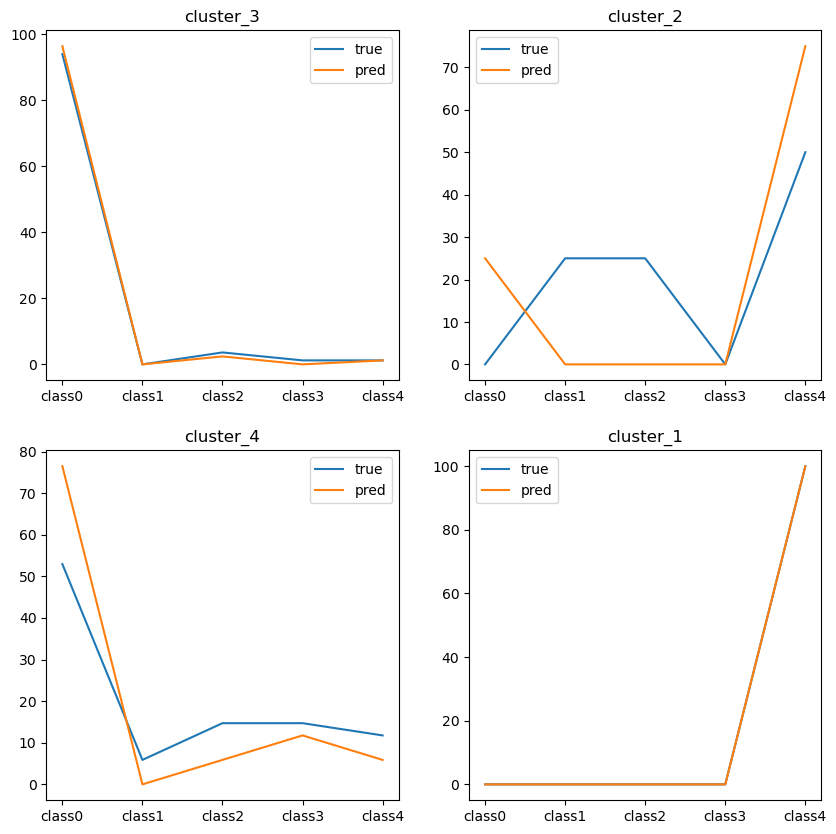

In [151]:
import matplotlib.pyplot as plt

columns = results_df.columns.tolist()
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))

for (i,j), col in zip([(0,0), (0,1), (1,0), (1,1)], columns):
    true_df = results_df[results_df['t/p'] == 'true']
    pred_df = results_df[results_df['t/p'] == 'predicted']
    axs[i,j].plot(true_df['class'], true_df[col], label = "true")
    axs[i,j].plot(pred_df['class'], pred_df[col], label = "pred")
    axs[i,j].set_title(col)
    axs[i,j].legend()
    

## 4. Conclusion:

Explain your findings and provide reasons for the behaviour.

For the clusters 1 and 3: the prediction is very close to the true value. While cluster 3 shows some variations in the predicted values, cluster 1 seems to be overfitted. This might be due to the fact that most of the data were in a single class. 

For the cluster 4: the prediction seems to follow the actual value to some extend but still has considerable differences.

for the cluster 2: the model does not seem to learn for classes 0-2, but performs okay in predicting class 3 and 4. 

The clustring model has done very well in clustering the data into 1 and 3. Also there are no rows clustered in cluster 0. 